In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
market_data = pd.read_excel("../../raw_data/market_data.xlsx")

In [3]:
market_data['Time (UTC+10)'] = pd.to_datetime(market_data['Time (UTC+10)'])
columns_name = market_data.columns
market_data.columns = [i for i in range(len(columns_name))]

In [4]:
for column in range(len(columns_name)):
    print(column, ":", columns_name[column])

0 : Time (UTC+10)
1 : Regions NSW Trading Price ($/MWh)
2 : Regions SA Trading Price ($/MWh)
3 : Regions TAS Trading Price ($/MWh)
4 : Regions VIC Trading Price ($/MWh)
5 : Regions NSW Trading Total Intermittent Generation (MW)
6 : Regions SA Trading Total Intermittent Generation (MW)
7 : Regions TAS Trading Total Intermittent Generation (MW)
8 : Regions VIC Trading Total Intermittent Generation (MW)
9 : Regions NSW Operational Demand (MW)
10 : Regions SA Operational Demand (MW)
11 : Regions TAS Operational Demand (MW)
12 : Regions VIC Operational Demand (MW)


In [5]:
market_data['Time of Day'] = market_data[0].dt.time

In [12]:
average_per30min = market_data.groupby(['Time of Day']).mean()

# Average market price per 30 min.
market_price_per30min = average_per30min[[1, 2, 3, 4]]

# Average Trading Total Intermittent Generation per 30 min.
TTI_generation_per30min = average_per30min[[5, 6, 7, 8]]

# Average Operational Demand per 30 min.
Operat_demand_per30min = average_per30min[[9, 10, 11, 12]]

### Average Trading Price per 30 min

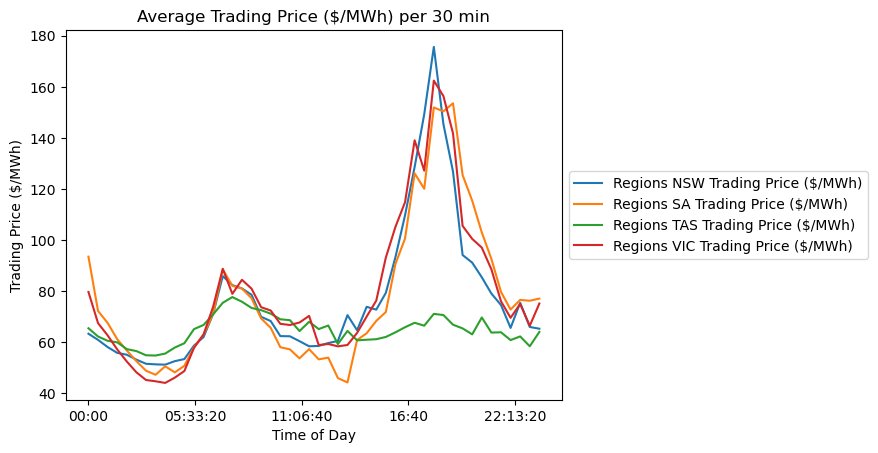

In [13]:
market_price_per30min.columns = [columns_name[i] for i in market_price_per30min.columns]
market_price_per30min.plot()
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Average Trading Price ($/MWh) per 30 min")
plt.ylabel("Trading Price ($/MWh)")
plt.show()

### Average Trading Total Intermittent Generation per 30 min

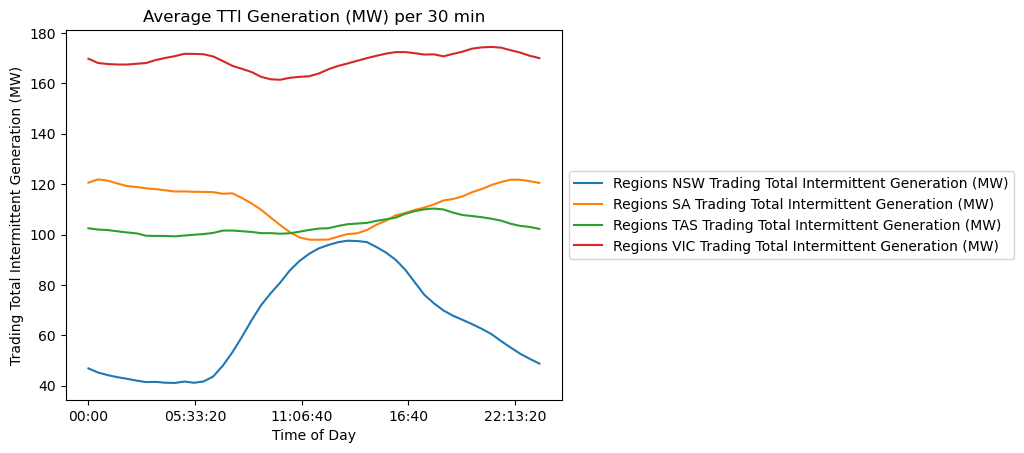

In [14]:
TTI_generation_per30min.columns = [columns_name[i] for i in TTI_generation_per30min.columns]
TTI_generation_per30min.plot()
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Average TTI Generation (MW) per 30 min")
plt.ylabel("Trading Total Intermittent Generation (MW)")
plt.show()

### Average Operational Demand per 30 min

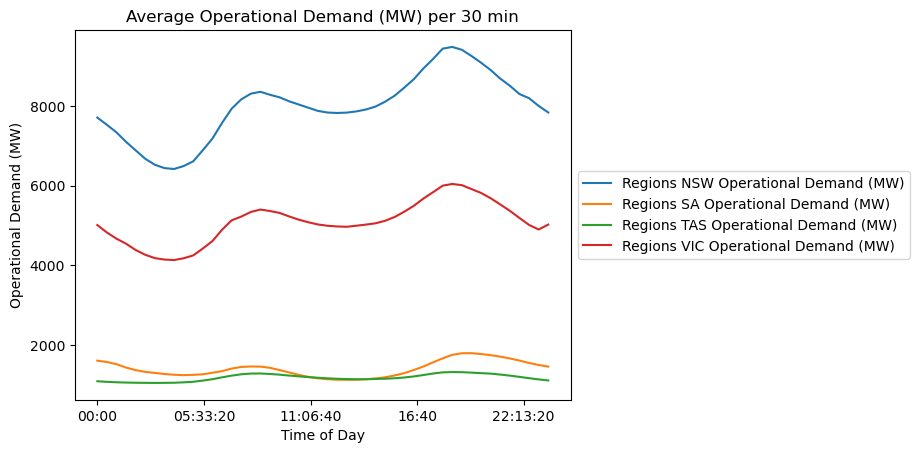

In [15]:
Operat_demand_per30min.columns = [columns_name[i] for i in Operat_demand_per30min.columns]
Operat_demand_per30min.plot()
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Average Operational Demand (MW) per 30 min")
plt.ylabel("Operational Demand (MW)")
plt.show()

### Add Period and year

In [16]:
market_data['year'] = market_data[0].dt.year

In [23]:
# Create a period for a whole day which are 48 as
# Spot prices are taken by the 30 minutes mark.
period = []
count = 1
for i in range(1, len(market_data) + 1):
    period.append(count)
    count += 1
    if (i % 48) == 0:
        count = 1
        
market_data['period'] = pd.Series(period)

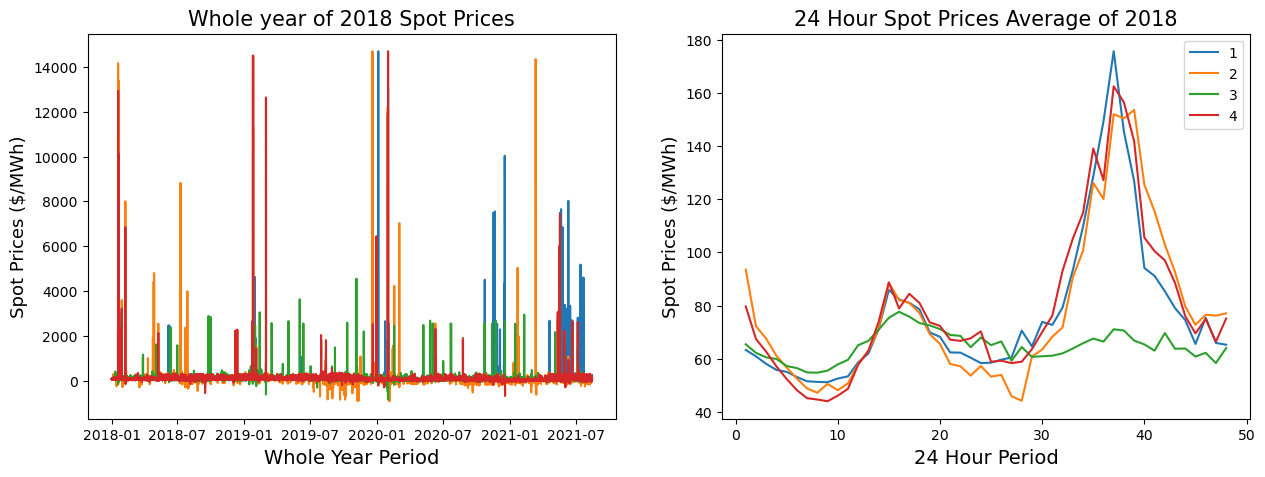

In [93]:
spot_prices = market_data[[0, 1, 2, 3, 4, 'period']]
spot_prices_perday = spot_prices.groupby('period').mean()

fig1, ax1 = plt.subplots(1, 2, figsize = (15, 5))
sns.lineplot(x = 0, y = 1, data = spot_prices, ax = ax1[0])
sns.lineplot(x = 0, y = 2, data = spot_prices, ax = ax1[0])
sns.lineplot(x = 0, y = 3, data = spot_prices, ax = ax1[0])
sns.lineplot(x = 0, y = 4, data = spot_prices, ax = ax1[0])

spot_prices_perday.plot(ax = ax1[1])

ax1[0].set_title('Whole year of 2018 Spot Prices', fontsize = 15)
ax1[0].set_ylabel('Spot Prices ($/MWh)', fontsize = 13)
ax1[0].set_xlabel('Whole Year Period', fontsize = 14)

ax1[1].set_title('24 Hour Spot Prices Average of 2018', fontsize = 15)
ax1[1].set_ylabel('Spot Prices ($/MWh)', fontsize = 13)
ax1[1].set_xlabel('24 Hour Period', fontsize = 14)

fig2018.suptitle('Energy Market Prices for 2018', fontsize = 20)
fig2018.tight_layout()
plt.show()

### 2018 Spot Prices

In [29]:
data_2018 = market_data[market_data['year'] == 2018]

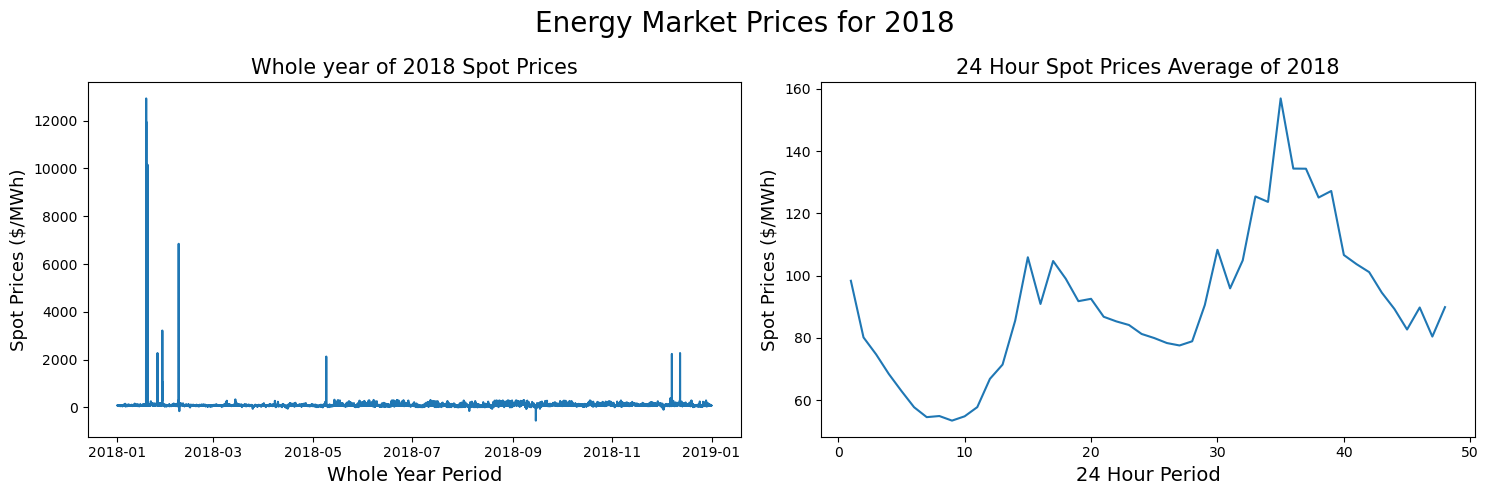

In [78]:
# Spot prices
spot_prices_2018 =  data_2018[[0, 1, 2, 3, 4, 'period']]
spot_prices_2018_perday = spot_prices_2018.groupby('period').mean()

fig2018, ax2018 = plt.subplots(1, 2, figsize = (15, 5))
sns.lineplot(x = 0, y = 4, data = spot_prices_2018, ax = ax2018[0])
spot_prices_2018_perday[4].plot(ax = ax2018[1])

ax2018[0].set_title('Whole year of 2018 Spot Prices', fontsize = 15)
ax2018[0].set_ylabel('Spot Prices ($/MWh)', fontsize = 13)
ax2018[0].set_xlabel('Whole Year Period', fontsize = 14)

ax2018[1].set_title('24 Hour Spot Prices Average of 2018', fontsize = 15)
ax2018[1].set_ylabel('Spot Prices ($/MWh)', fontsize = 13)
ax2018[1].set_xlabel('24 Hour Period', fontsize = 14)

fig2018.suptitle('Energy Market Prices for 2018', fontsize = 20)
fig2018.tight_layout()
plt.show()

### 2019 Spot Prices

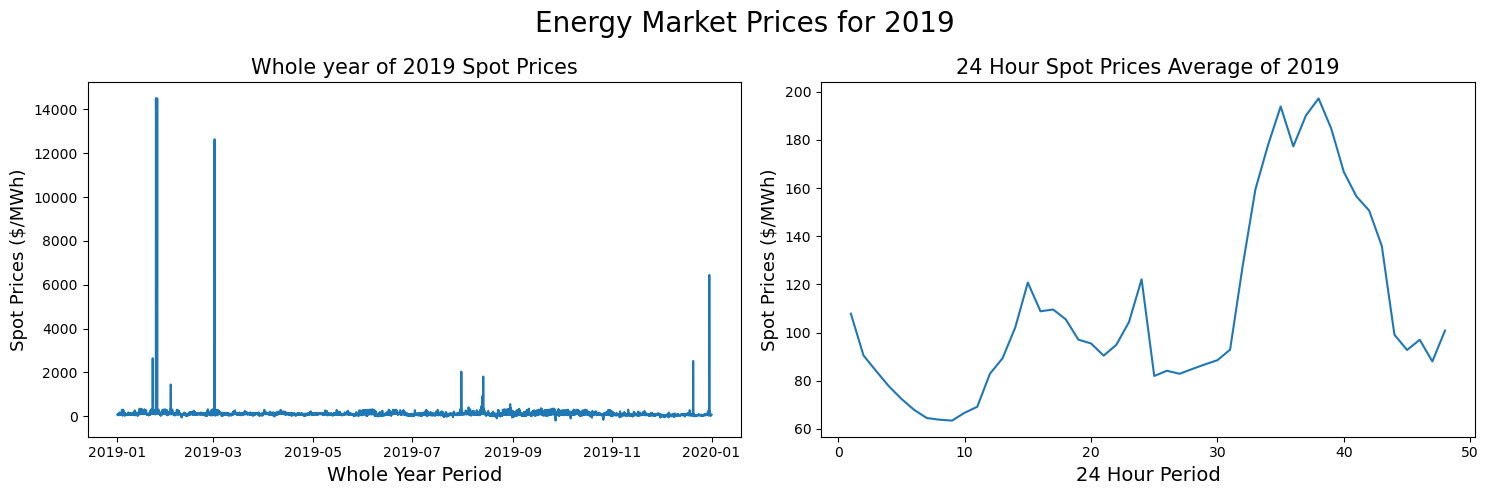

In [79]:
data_2019 = market_data[market_data['year'] == 2019]

# Spot prices
spot_prices_2019 =  data_2019[[0, 1, 2, 3, 4, 'period']]
spot_prices_2019_perday = spot_prices_2019.groupby('period').mean()

fig2019, ax2019 = plt.subplots(1, 2, figsize = (15, 5))
sns.lineplot(x = 0, y = 4, data = spot_prices_2019, ax = ax2019[0])
spot_prices_2019_perday[4].plot(ax = ax2019[1])

ax2019[0].set_title('Whole year of 2019 Spot Prices', fontsize = 15)
ax2019[0].set_ylabel('Spot Prices ($/MWh)', fontsize = 13)
ax2019[0].set_xlabel('Whole Year Period', fontsize = 14)

ax2019[1].set_title('24 Hour Spot Prices Average of 2019', fontsize = 15)
ax2019[1].set_ylabel('Spot Prices ($/MWh)', fontsize = 13)
ax2019[1].set_xlabel('24 Hour Period', fontsize = 14)

fig2019.suptitle('Energy Market Prices for 2019', fontsize = 20)
fig2019.tight_layout()
plt.show()

### 2020 Spot Prices

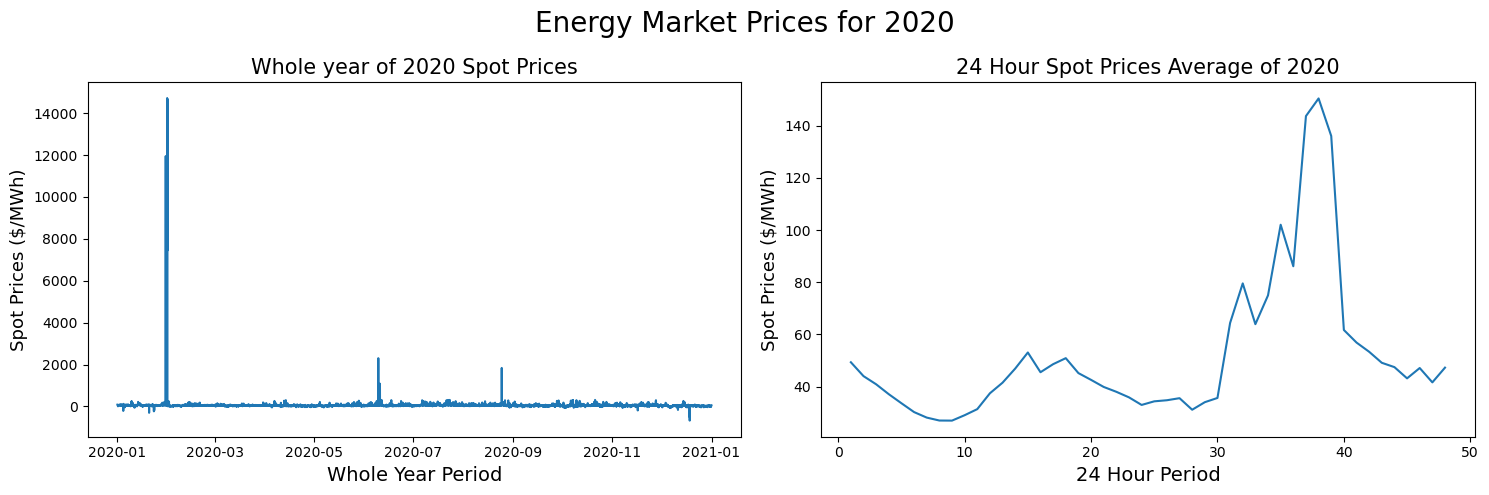

In [80]:
data_2020 = market_data[market_data['year'] == 2020]

# Spot prices
spot_prices_2020 =  data_2020[[0, 1, 2, 3, 4, 'period']]
spot_prices_2020_perday = spot_prices_2020.groupby('period').mean()

fig2020, ax2020 = plt.subplots(1, 2, figsize = (15, 5))
sns.lineplot(x = 0, y = 4, data = spot_prices_2020, ax = ax2020[0])
spot_prices_2020_perday[4].plot(ax = ax2020[1])

ax2020[0].set_title('Whole year of 2020 Spot Prices', fontsize = 15)
ax2020[0].set_ylabel('Spot Prices ($/MWh)', fontsize = 13)
ax2020[0].set_xlabel('Whole Year Period', fontsize = 14)

ax2020[1].set_title('24 Hour Spot Prices Average of 2020', fontsize = 15)
ax2020[1].set_ylabel('Spot Prices ($/MWh)', fontsize = 13)
ax2020[1].set_xlabel('24 Hour Period', fontsize = 14)

fig2020.suptitle('Energy Market Prices for 2020', fontsize = 20)
fig2020.tight_layout()
plt.show()

### 2021 Spot Prices

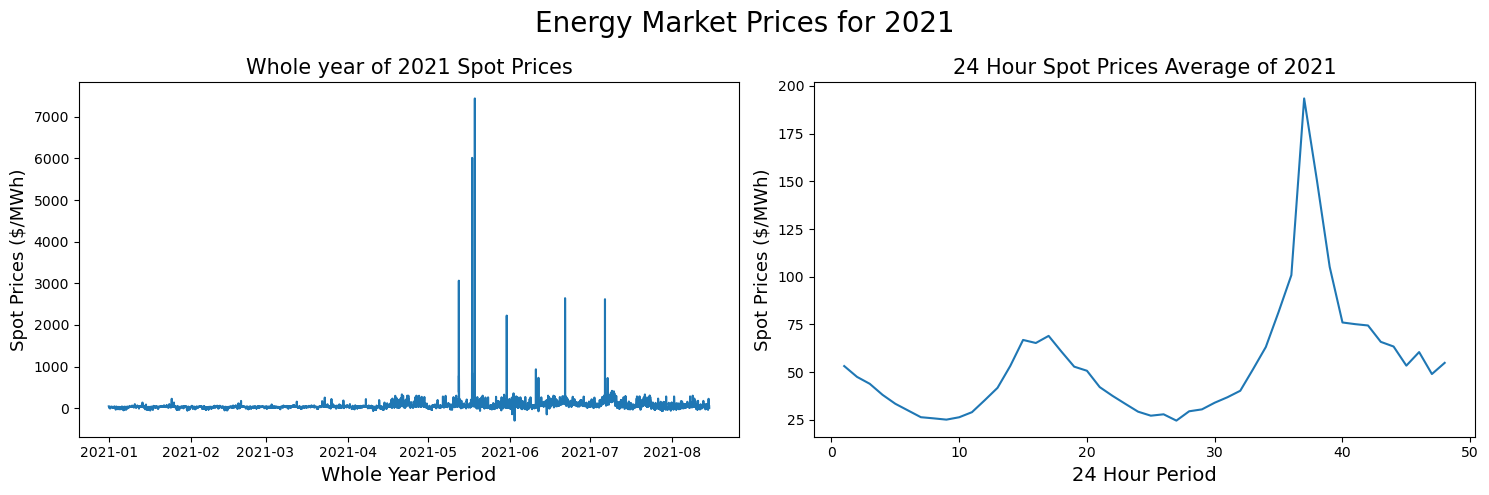

In [81]:
data_2021 = market_data[market_data['year'] == 2021]

# Spot prices
spot_prices_2021 =  data_2021[[0, 1, 2, 3, 4, 'period']]
spot_prices_2021_perday = spot_prices_2021.groupby('period').mean()

fig2021, ax2021 = plt.subplots(1, 2, figsize = (15, 5))
sns.lineplot(x = 0, y = 4, data = spot_prices_2021, ax = ax2021[0])
spot_prices_2021_perday[4].plot(ax = ax2021[1])

ax2021[0].set_title('Whole year of 2021 Spot Prices', fontsize = 15)
ax2021[0].set_ylabel('Spot Prices ($/MWh)', fontsize = 13)
ax2021[0].set_xlabel('Whole Year Period', fontsize = 14)

ax2021[1].set_title('24 Hour Spot Prices Average of 2021', fontsize = 15)
ax2021[1].set_ylabel('Spot Prices ($/MWh)', fontsize = 13)
ax2021[1].set_xlabel('24 Hour Period', fontsize = 14)

fig2021.suptitle('Energy Market Prices for 2021', fontsize = 20)
fig2021.tight_layout()
plt.show()